## Data Description
This dataset concerns a problem in the treatment of breast cancer, namely determining whether a person diagnosed with invasive breast cancer will or will not respond to chemotherapy treatment. 

There are two classes labeled “treatment sensitive” and “treatment-resistant”:
* Tumors are labeled “sensitive” if all target lesions disappear after six months of chemotherapy. 
* Tumors are labeled “resistant” otherwise.

In [1]:
# setting environment
import numpy as np
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

from scipy import stats
from scipy.stats import entropy,differential_entropy,ranksums

from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression,RFECV

In [2]:
# loading data
    ## nrow=13211, measurements
    ## ncol=289, col0: measurement symbols, col1-288: lesion
    ## df1=(13211,288), dtype=float64, for calculation convenience
df = pd.read_csv('data27.txt',sep='\t',header=0)
df1 = df.iloc[:,1:].astype("float64")
df.head()

,SYMBOL,RESISTANT_GSM615096,RESISTANT_GSM615097,RESISTANT_GSM615098,SENSITIVE_GSM615099,RESISTANT_GSM615100,RESISTANT_GSM615101,RESISTANT_GSM615104,RESISTANT_GSM615106,RESISTANT_GSM615107,...,SENSITIVE_GSM615396,SENSITIVE_GSM615397,RESISTANT_GSM615398,RESISTANT_GSM615399,RESISTANT_GSM615400,RESISTANT_GSM615401,RESISTANT_GSM615402,RESISTANT_GSM615403,RESISTANT_GSM615404,RESISTANT_GSM615405
0,A1CF,8.845503,9.567856,8.550555,8.268963,8.992042,8.709745,9.818268,9.376347,9.349482,...,9.035284,9.257625,9.577589,10.752221,8.014299,8.515230,8.668795,9.970560,7.481060,8.273308
1,A2M,12.215645,13.988573,14.291476,12.027604,12.785805,11.794836,13.249973,11.958015,11.925186,...,12.505441,10.617434,9.808126,11.822586,10.372657,8.726082,9.056092,12.049887,9.055032,10.135353
2,A4GALT,6.897060,7.193295,7.302172,7.316276,7.682271,6.456527,6.481680,6.068469,7.295377,...,7.694000,6.815264,7.673296,7.721488,7.174450,8.123947,8.277071,6.487463,3.856573,7.327143
3,A4GNT,7.938977,9.029266,7.887399,8.424339,8.044635,8.388111,8.638043,8.546588,8.025016,...,8.236550,7.515433,8.574149,9.179158,8.136495,5.544550,7.865095,6.870677,7.382791,8.252139
4,AAAS,8.398082,5.309944,7.855131,7.596459,7.082710,5.034950,8.386164,6.262888,7.740198,...,8.491371,5.487067,8.094386,7.978314,7.959179,8.698886,8.074550,9.303087,8.206866,7.919051


In [3]:
# saving labels
df_colnames=np.array([i.split('_') for i in df.columns[1:]])
resistance=df_colnames[:,0] # ['RESISTANT','SENSITIVE'], Length: 288
lesion=df_colnames[:,1] # ['GSM615096','GSM615097'], Length: 288
Y=np.array([1 if i=='RESISTANT' else 0 for i in resistance]) # [1,0], 1 if lesion is RESISTANT, Length: 288
symbol=np.array(df.iloc[:,0]) # ['A1CF','A2M'], Length: 13211

# Descriptive Statistics

## Entropy and Mutual Info
Y is a discrete variable with values 0s and 1s, containing information about the resistance of lesion after the six months of chemotherapy.

Y has pmf $f_Y(y) = P(Y = y),y\in \{0,1\}$

The entropy of Y, $H(Y) = −E(log_2 f_Y(y))$, which is interpreted as the amount of uncertainy in Y.

As shown in hist plot, $X_i$ has a normal-shape distribution.

Text(0, 0.5, 'Probability')

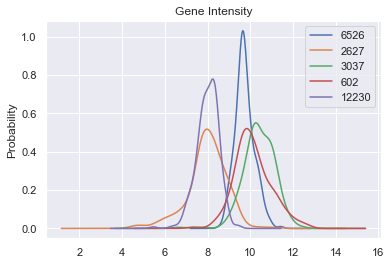

<Figure size 720x360 with 0 Axes>

In [4]:
n=13211
x=sample(list(range(n)),5)
dist=df1.iloc[x,:].T
sns.set(style="darkgrid")
fig, ax = plt.subplots()
fig = plt.figure(figsize=(10, 5))
dist.plot.kde(ax=ax, legend=True, title='Gene Intensity',color=sns.color_palette('deep'))
# dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')

In [5]:
# Entropy list of 13211 chemotherapy treatments, using base=2
En_Xi=np.array([])
for i in range(n):
    entropy=differential_entropy(df1.iloc[i,:],base=2)
    En_Xi=np.append(En_Xi,entropy)
# show treatment names with top 10 entropy
sorted_En_Xi=sorted(range(n),key = lambda sub: En_Xi[sub],reverse=True)
# top_En_name=np.array(df.iloc[sorted_En_Xi[:10],0])
print('\n')
print('Top 10 entropy Xi are:')
print(df.iloc[sorted_En_Xi[:10],0])
#
# Mutual Info between each of top100-entropy-Xi and Y
m=100
X = np.array(df1.iloc[sorted_En_Xi[:m],:]).T
I_X_Y=mutual_info_regression(X, Y)
print('\n The mean of Mutual Info is %.3f' % np.mean(I_X_Y))
print('The maximum Mutual Info is %.3f' % np.max(I_X_Y))
#
# Mutual Info between each of bottom100-entropy-Xi and Y
X2 = np.array(df1.iloc[sorted_En_Xi[-m:],:]).T
I_X_Y2=mutual_info_regression(X2, Y)
print('\n The mean of Mutual Info is %.3f' % np.mean(I_X_Y2))
print('The maximum Mutual Info is %.3f' % np.max(I_X_Y2))



Top 10 entropy Xi are:
10250                             SCGB2A2
7927                                NPY1R
6722                                  LTF
6184                                KRT14
4324                                GABRP
10249                             SCGB2A1
6185                                KRT15
298                                  AGR2
5492     IGHA1 /// IGHA2 /// LOC100126583
10248                             SCGB1D2
Name: SYMBOL, dtype: object

 The mean of Mutual Info is 0.022
The maximum Mutual Info is 0.091

 The mean of Mutual Info is 0.010
The maximum Mutual Info is 0.050


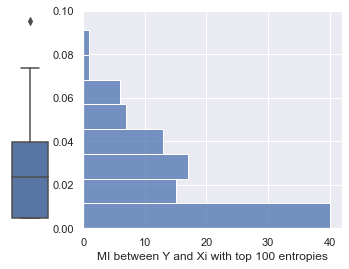

In [55]:
# sns.distplot(a=En_Xi, hist=True, kde=False, rug=False)
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(1,2, sharex='col', gridspec_kw={"width_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(y=I_X_Y, ax=ax_box)
sns.histplot(y=I_X_Y,ax=ax_hist)
ax_box.set_axis_off()
# Remove x axis name for the boxplot
ax_hist.set_xlabel('MI between Y and Xi with top 100 entropies')
plt.ylim([0,0.1])
plt.show()

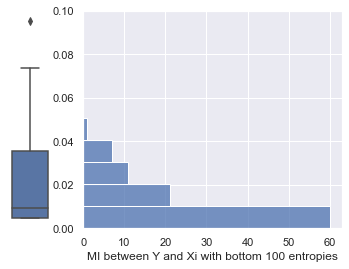

In [57]:
# sns.distplot(a=En_Xi, hist=True, kde=False, rug=False)
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(1,2, sharex='col', gridspec_kw={"width_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(y=I_X_Y2, ax=ax_box)
sns.histplot(y=I_X_Y2, ax=ax_hist,bins=5)
ax_box.set_axis_off()
# Remove x axis name for the boxplot
ax_hist.set_xlabel('MI between Y and Xi with bottom 100 entropies')
plt.ylim([0,0.1])
plt.show()

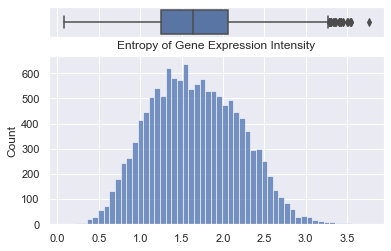

In [59]:
# sns.distplot(a=En_Xi, hist=True, kde=False, rug=False)
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(x=En_Xi, ax=ax_box)
sns.histplot(x=En_Xi, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='Entropy of Gene Expression Intensity')
plt.show()

In [60]:
# split data index
filtered_df2=df1.T.iloc[:,] # (144,13211)
label0=np.where(Y==0)
label1=np.where(Y==1)
train_rows=np.append(label0[0][:26],label1[0][:118])
test_rows=np.append(label0[0][26:],label1[0][118:])

X_train=df1.T.iloc[train_rows,:] # (144,13211)
X_test=df1.T.iloc[test_rows,:] # (144, 13211)
y=[0]*26+[1]*118

# Feature Pre-filter 

In [61]:
# split data
n=13211
m=100
a=26
b=118
# filtered_df2=df1.T.iloc[:,highWilIndex[:150]] # (144,100)
label0=np.where(Y==0)
label1=np.where(Y==1)
train_rows=np.append(label0[0][:26],label1[0][:118])
test_rows=np.append(label0[0][26:],label1[0][118:])
y=[0]*26+[1]*118
# X_train=df1.T.iloc[train_rows,:] # (144,100)
# X_test=df1.T.iloc[test_rows,:] # (144, 100)

In [62]:
# split train & test at first
X_train=df1.T.iloc[train_rows,:] # (144, 13211)

# Wilcoxon rank-sum test
Wil=[]
pVal=[]
for i in range(n):
    wil,p=ranksums(X_train.iloc[:a,i], X_train.iloc[a:,i])
    Wil.append(wil)
    pVal.append(p)
sorted_Wil=sorted(range(n),key = lambda sub: Wil[sub],reverse=True)
Top100Wil=sorted_Wil[:100]

sorted_pVal=sorted(range(n),key = lambda sub: pVal[sub])
Bottom100pVal=sorted_pVal[:100]

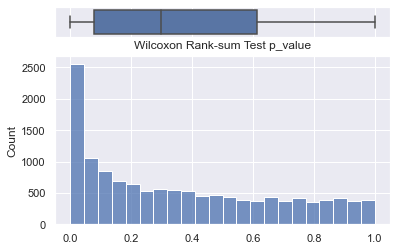

In [13]:
# sns.distplot(a=En_Xi, hist=True, kde=False, rug=False)
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# assigning a graph to each ax
sns.boxplot(x=pVal, ax=ax_box)
sns.histplot(x=pVal, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='Wilcoxon Rank-sum Test p_value')
plt.show()

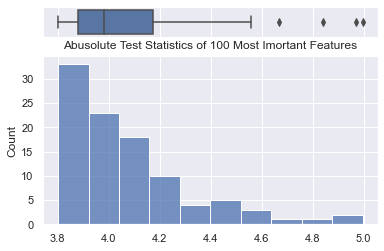

In [14]:
# sns.distplot(a=En_Xi, hist=True, kde=False, rug=False)
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
wil100 = [round(abs(Wil[i]),3) for i in sorted(Bottom100pVal)]
# assigning a graph to each ax
sns.boxplot(x=wil100, ax=ax_box)
sns.histplot(x=wil100, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='Abusolute Test Statistics of 100 Most Imortant Features')
plt.show()

## Enrichment of Top100Wil

## RU and RO

In [63]:
import imblearn
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# T1 = [144,100]
T1=X_train.iloc[:,Bottom100pVal] # (26+118, 100)
y1=y

# RO (T2) = [236,100]
oversample = RandomOverSampler(sampling_strategy='minority')
T2, y2 = oversample.fit_resample(T1, y1) # (118+118, 100)

# RU (T3) = [52,100]
undersample = RandomUnderSampler(sampling_strategy='majority')
T3, y3 = undersample.fit_resample(T1, y1) # (26+26, 100)

# RO & RU (T4) = [140,100]
over = RandomOverSampler(sampling_strategy=0.6)
T4, y4 = over.fit_resample(T1, y1)
under = RandomUnderSampler(sampling_strategy=1)
T4, y4 = under.fit_resample(T4, y4) # (70+70, 100)

In [68]:
def RandomSample(T1,y1):
    oversample = RandomOverSampler(sampling_strategy='minority')
    T2, y2 = oversample.fit_resample(T1, y1)
    undersample = RandomUnderSampler(sampling_strategy='majority')
    T3, y3 = undersample.fit_resample(T1, y1)
    over = RandomOverSampler(sampling_strategy=0.6)
    T4, y4 = over.fit_resample(T1, y1)
    under = RandomUnderSampler(sampling_strategy=1)
    T4, y4 = under.fit_resample(T4, y4)
    train_list = [
    (T1,y1),
    (T2, y2), 
    (T3,y3),
    (T4, y4)]
    return(train_list)

## TSNE for training set

In [64]:
from sklearn.manifold import TSNE
from numpy import reshape
from matplotlib.gridspec import GridSpec

In [ ]:
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(nrows=1, ncols=2)
ax0 = fig.add_subplot(gs[0, 0])
ax0.scatter(x=z[:,0], y=z[:,1],hue=y,palette=sns.color_palette("deep", 2)).set(title=tsne_title) 
# ax1 = fig.add_subplot(gs[0, 1])
# ax1=scatter(x=z2[:,0], y=z2[:,1],hue=y1,palette=sns.color_palette("deep", 2)).set(title=tsne_title) 
# ax2 = fig.add_subplot(gs[:, 1])
# ax2.plot(time, score)
# ax3 = fig.add_axes([0.6, 0.6, 0.2, 0.2])
# ax3.hist(distribution)
plt.show()

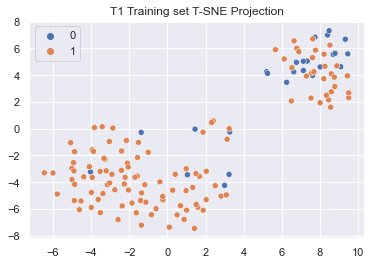

In [45]:
tsne_T=T1
tsne_y=y1
i=1
tsne_title = "T{} Training set T-SNE Projection".format(i)

tsne = TSNE(init='random',learning_rate='auto')
z = tsne.fit_transform(tsne_T) 
tsne1=sns.scatterplot(x=z[:,0], y=z[:,1],hue=y1,
                      palette=sns.color_palette("deep", 2)).set(title=tsne_title) 

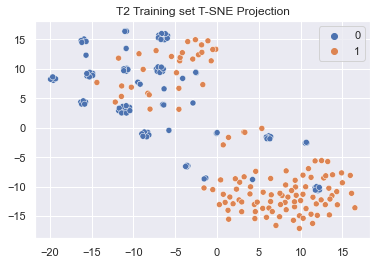

In [42]:
tsne_T=T2
tsne_y=y2
i=2
tsne_title = "T{} Training set T-SNE Projection".format(i)

tsne = TSNE(init='random',learning_rate='auto')
z = tsne.fit_transform(tsne_T) 
tsne2=sns.scatterplot(x=z[:,0], y=z[:,1],hue=tsne_y,
                      palette=sns.color_palette("deep", 2)).set(title=tsne_title) 

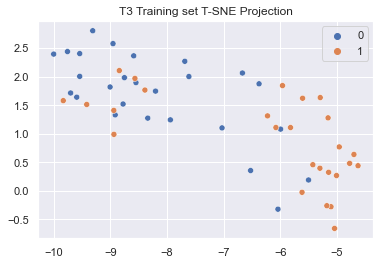

In [43]:
tsne_T=T3
tsne_y=y3
i=3
tsne_title = "T{} Training set T-SNE Projection".format(i)

tsne = TSNE(init='random',learning_rate='auto')
z = tsne.fit_transform(tsne_T) 
tsne3=sns.scatterplot(x=z[:,0], y=z[:,1],hue=tsne_y,
                      palette=sns.color_palette("deep", 2)).set(title=tsne_title) 

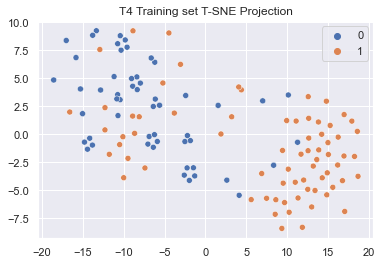

In [44]:
tsne_T=T4
tsne_y=y4
i=4
tsne_title = "T{} Training set T-SNE Projection".format(i)

tsne = TSNE(init='random',learning_rate='auto')
z = tsne.fit_transform(tsne_T) 
tsne4=sns.scatterplot(x=z[:,0], y=z[:,1],hue=tsne_y,
                      palette=sns.color_palette("deep", 2)).set(title=tsne_title) 

## Prediction

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.calibration import CalibrationDisplay
from matplotlib.gridspec import GridSpec
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [121]:
# para
[n,m,k]=[13211,100,144]
[a,b]=[26,118]
impFeature=df.iloc[Bottom100pVal,0]

# testing set
X_test=df1.T.iloc[test_rows,Bottom100pVal] # (144, 100)
y_test=[0]*26+[1]*118

In [133]:
# Create classifiers
gnb = GaussianNB()
l_svc = svm.SVC(kernel='linear',max_iter=50000,probability=True)
rbf_svc=svm.SVC(kernel='rbf',probability=True)
rfc = RandomForestClassifier()
knn=KNeighborsClassifier(n_neighbors=5)
clf_list = [
    (gnb, "Naive Bayes"),
    (l_svc, "Linear SVC"), 
    (rbf_svc,"RBF SVC"),
    (rfc, "Random forest")
]

clf_dict = {
    "Naive Bayes": gnb,
    "Random Forest": rfc,
    "RBF SVC":rbf_svc,
    "Linear SVC":l_svc
}

train_list = [
    (T1,y1),
    (T2, y2), 
    (T3,y3),
    (T4, y4)
]

train_dict = {
    "T1":(T1,y1),
    "T2":(T2,y2),
    "T3":(T3,y3),
    "T4":(T4,y4)
}

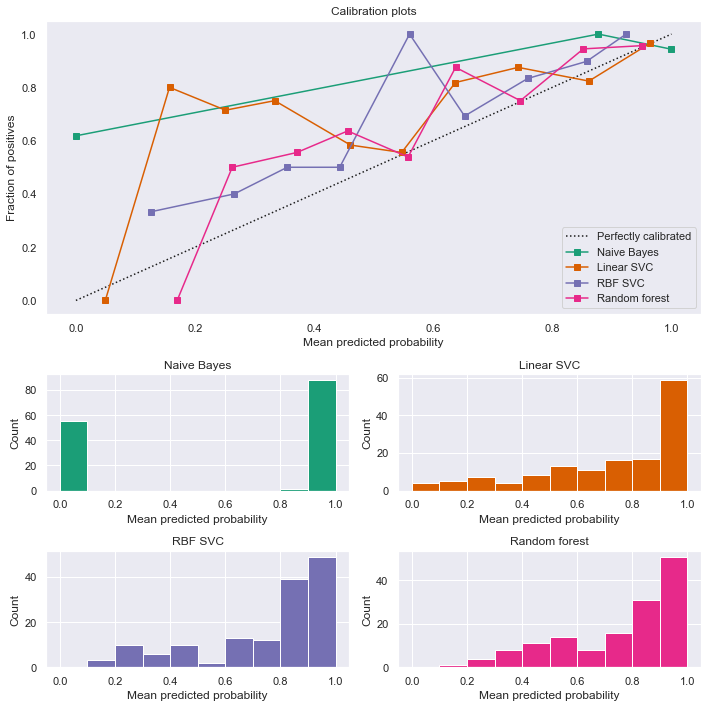

In [134]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}

X_train,y_train=T1,y1
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

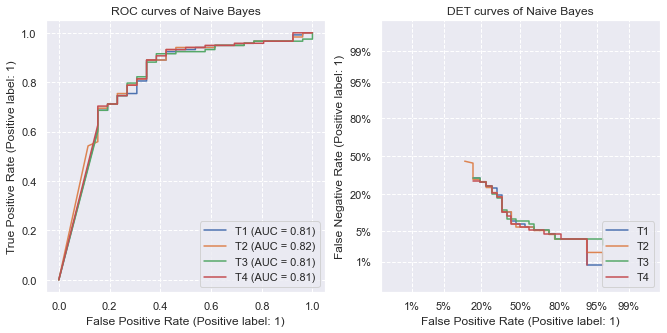

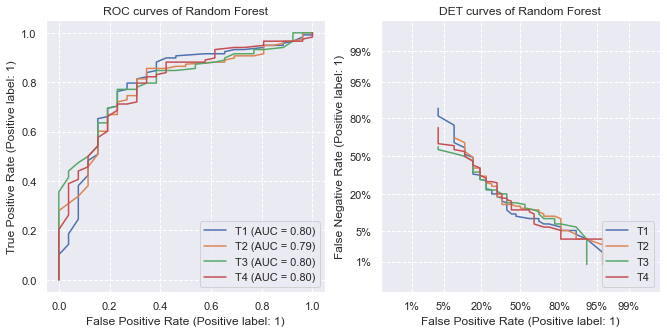

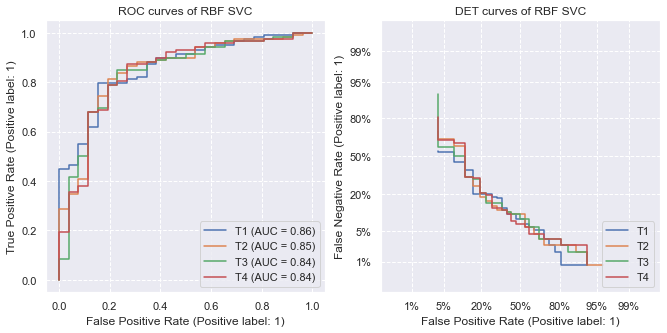

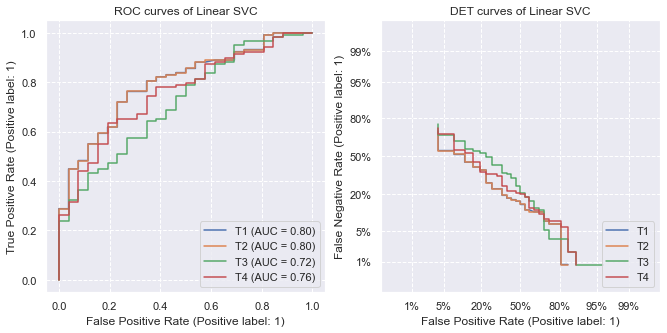

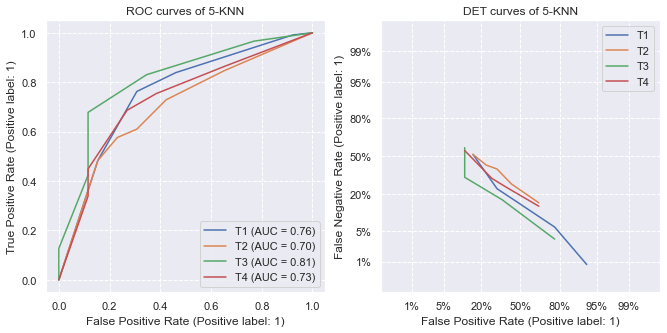

In [132]:
clf_dict = {
    "Naive Bayes": gnb,
    "Random Forest": rfc,
    "RBF SVC":rbf_svc,
    "Linear SVC":l_svc,
    "5-KNN": knn
}
# prepare plots
for name, clf in clf_dict.items():
    fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))
    roc_title = "ROC curves of {}".format(name)
    det_title = "DET curves of {}".format(name)
    for T, (X,y) in train_dict.items():
        clf.fit(X,y)

        RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=T)
        DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name=T)

    ax_roc.set_title(roc_title)
    ax_det.set_title(det_title)
    ax_roc.grid(linestyle="--")
    ax_det.grid(linestyle="--")

plt.legend()
plt.show()

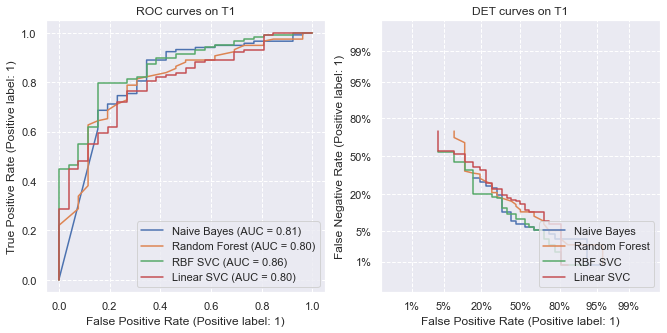

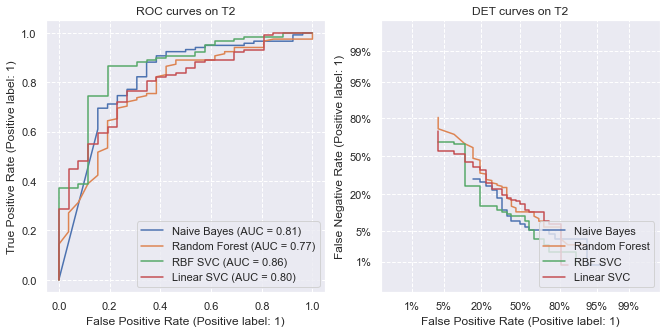

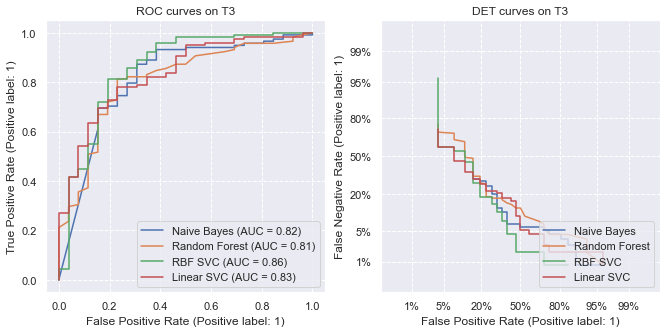

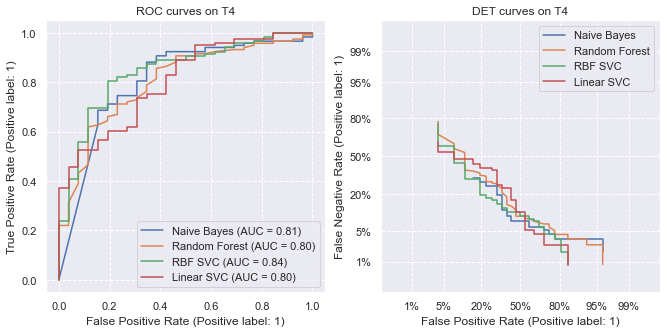

In [24]:
# prepare plots
for T,(X_train, y_train) in train_dict.items():
    fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))
    roc_title = "ROC curves on {}".format(T)
    det_title = "DET curves on {}".format(T)
    for name, clf in clf_dict.items():
        clf.fit(X_train, y_train)

        RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
        DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name=name)

    ax_roc.set_title(roc_title)
    ax_det.set_title(det_title)

    ax_roc.grid(linestyle="--")
    ax_det.grid(linestyle="--")

plt.legend()
plt.show()

In [ ]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(T1, y1)

# Print the name and gini importance of each feature
for feature in zip(impFeature, clf.feature_importances_):
    print(feature)
    
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

In [125]:
model = KNeighborsClassifier(n_neighbors=5)
results=np.array([])
for (T,y) in train4:
    result = cross_val_score(model, T, y, cv=skf)
    score=[round(np.mean(result),3),round(np.std(result),3)]
    results=np.append(results,score)
print(results.reshape((4,2)))

[[0.854 0.007]
 [0.78  0.034]
 [0.788 0.058]
 [0.829 0.   ]]


In [116]:
# from sklearn.model_selection import cross_val_score
## model
gnb = GaussianNB()
l_svc = svm.SVC(kernel='linear',max_iter=50000,probability=True)
rbf_svc=svm.SVC(kernel='rbf',probability=True)
rfc = RandomForestClassifier()

## half train half test
skf = StratifiedKFold(n_splits=2)
## RO,RU
train4=RandomSample(T1,y1)
## test

for name, clf in clf_dict.items():
    model=clf
    results=np.array([])
    for (T,y) in train4:
        result = cross_val_score(model, T, y, cv=skf)
        score=[round(np.mean(result),3),round(np.std(result),3)]
        results=np.append(results,score)
    print("{} Accuracy:\n{}".format(name,results.reshape((4,2))))

Naive Bayes Accuracy:
[[0.826 0.035]
 [0.835 0.038]
 [0.788 0.058]
 [0.857 0.   ]]
Random Forest Accuracy:
[[0.826 0.007]
 [0.915 0.017]
 [0.769 0.038]
 [0.921 0.007]]
RBF SVC Accuracy:
[[0.833 0.014]
 [0.826 0.013]
 [0.788 0.058]
 [0.857 0.   ]]
Linear SVC Accuracy:
[[0.799 0.021]
 [0.864 0.034]
 [0.731 0.038]
 [0.914 0.   ]]


In [129]:
# Initialize classifier:
for name, clf in clf_dict.items():
    model=clf
    for (T,y) in train_list:
        model.fit(T, y)
        prediction = model.predict(X_test)
        score=accuracy_score(prediction, y_test)
        print('%s, Score: %.3f' % (name,score))

Naive Bayes, Score: 0.729
Naive Bayes, Score: 0.722
Naive Bayes, Score: 0.729
Naive Bayes, Score: 0.722
Random Forest, Score: 0.833
Random Forest, Score: 0.812
Random Forest, Score: 0.701
Random Forest, Score: 0.771
RBF SVC, Score: 0.847
RBF SVC, Score: 0.778
RBF SVC, Score: 0.715
RBF SVC, Score: 0.722
Linear SVC, Score: 0.743
Linear SVC, Score: 0.743
Linear SVC, Score: 0.556
Linear SVC, Score: 0.667


In [130]:
model=KNeighborsClassifier(n_neighbors=5)
for (T,y) in train_list:
    model.fit(T, y)
    prediction = model.predict(X_test)
    score=accuracy_score(prediction, y_test)
    print('KNN Score: %.3f' % score)

KNN Score: 0.785
KNN Score: 0.625
KNN Score: 0.715
KNN Score: 0.694


Feature: 0, Score: 0.04548
Feature: 1, Score: 0.05424
Feature: 2, Score: 0.03543
Feature: 3, Score: 0.00492
Feature: 4, Score: 0.00424
Feature: 5, Score: 0.00951
Feature: 6, Score: 0.00875
Feature: 7, Score: 0.01558
Feature: 8, Score: 0.01931
Feature: 9, Score: 0.00583


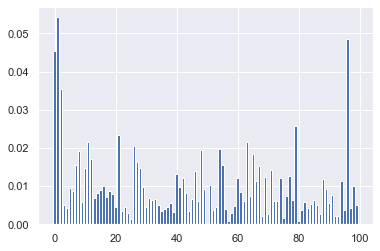

In [29]:
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X_train, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance[:10]):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [32]:

X_train, X_test, y_train, y_test = train_test_split(T1, pd.DataFrame(y1), test_size=0.4, random_state=0)
X_train.shape, y_train.shape

((86, 100), (86, 1))

In [80]:
from sklearn.model_selection import cross_val_score
SVC_model = svm.SVC(kernel='rbf')
skf = StratifiedKFold(n_splits=2)
results = cross_val_score(SVC_model, T1, y1, cv=skf) 

In [95]:
for train_index, test_index in skf.split(T3, y3):
    print("TRAIN:", train_index, "TEST:", test_index,"class:",np.array(y3)[train_index])
    X_train, X_test = train_index, test_index
    y_train, y_test = np.array(y3)[train_index], np.array(y3)[test_index]

TRAIN: [13 14 15 16 17 18 19 20 21 22 23 24 25 39 40 41 42 43 44 45 46 47 48 49
 50 51] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 26 27 28 29 30 31 32 33 34 35 36
 37 38] class: [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 26 27 28 29 30 31 32 33 34 35 36
 37 38] TEST: [13 14 15 16 17 18 19 20 21 22 23 24 25 39 40 41 42 43 44 45 46 47 48 49
 50 51] class: [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [145]:
ac=pd.read_csv('accuracy.csv',header=0)
ac[['CVmean','CVsd']] = ac.iloc[:,2].str.split(expand=True)
ac

,Model,Ti,Cross Validation Score Mean & Sd,Accuracy on Test Set,CVmean,CVsd
0,Naive Bayes,1,0.826 0.035,0.729,0.826,0.035
1,Naive Bayes,2,0.835 0.038,0.722,0.835,0.038
2,Naive Bayes,3,0.788 0.058,0.729,0.788,0.058
3,Naive Bayes,4,0.857 0.000,0.722,0.857,0.000
4,Random Forest,1,0.826 0.007,0.833,0.826,0.007
5,Random Forest,2,0.915 0.017,0.812,0.915,0.017
6,Random Forest,3,0.769 0.038,0.701,0.769,0.038
7,Random Forest,4,0.921 0.007,0.771,0.921,0.007
8,RBF SVC,1,0.833 0.014,0.847,0.833,0.014
9,RBF SVC,2,0.826 0.013,0.778,0.826,0.013


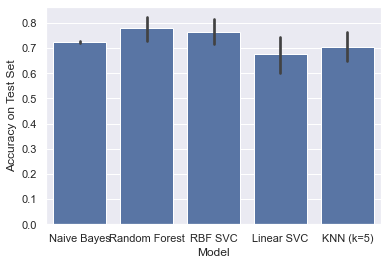

In [197]:
ax=sns.barplot(x="Model", y="Accuracy on Test Set", data=ac,
              palette=sns.color_palette("deep", 1))


<AxesSubplot:xlabel='Ti', ylabel='Accuracy on Test Set'>

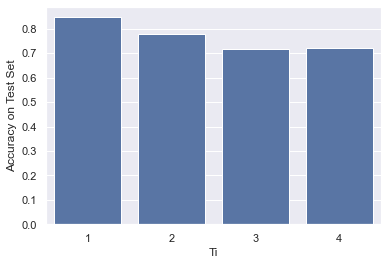

In [174]:
sns.barplot(x="Ti", y="Accuracy on Test Set", data=ac.loc[ac.Model=='RBF SVC'],
              palette=sns.color_palette("deep", 1))

<AxesSubplot:xlabel='Ti', ylabel='Accuracy on Test Set'>

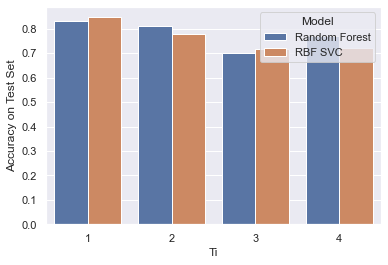

In [195]:
sns.barplot(x="Ti", y="Accuracy on Test Set", data=ac.loc[a+b,:],
              palette=sns.color_palette("deep", 2),hue="Model")

In [186]:

a=ac.Model=='Random Forest'
b=ac.Model=='RBF SVC'


In [194]:
ac.loc[a+b,:]

,Model,Ti,Cross Validation Score Mean & Sd,Accuracy on Test Set,CVmean,CVsd
4,Random Forest,1,0.826 0.007,0.833,0.826,0.007
5,Random Forest,2,0.915 0.017,0.812,0.915,0.017
6,Random Forest,3,0.769 0.038,0.701,0.769,0.038
7,Random Forest,4,0.921 0.007,0.771,0.921,0.007
8,RBF SVC,1,0.833 0.014,0.847,0.833,0.014
9,RBF SVC,2,0.826 0.013,0.778,0.826,0.013
10,RBF SVC,3,0.788 0.058,0.715,0.788,0.058
11,RBF SVC,4,0.857 0.000,0.722,0.857,0.000
